In [10]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

IPythonConsole.ipython_useSVG = False
DrawingOptions.includeAtomNumbers = False

def show_mol_grid(mols):
    return MolsToGridImage(
        [x.asRDMol() for x in mols]
        , subImgSize=(250,200)
        , legends=[x.parent_operator for x in mols]
    )

1
19


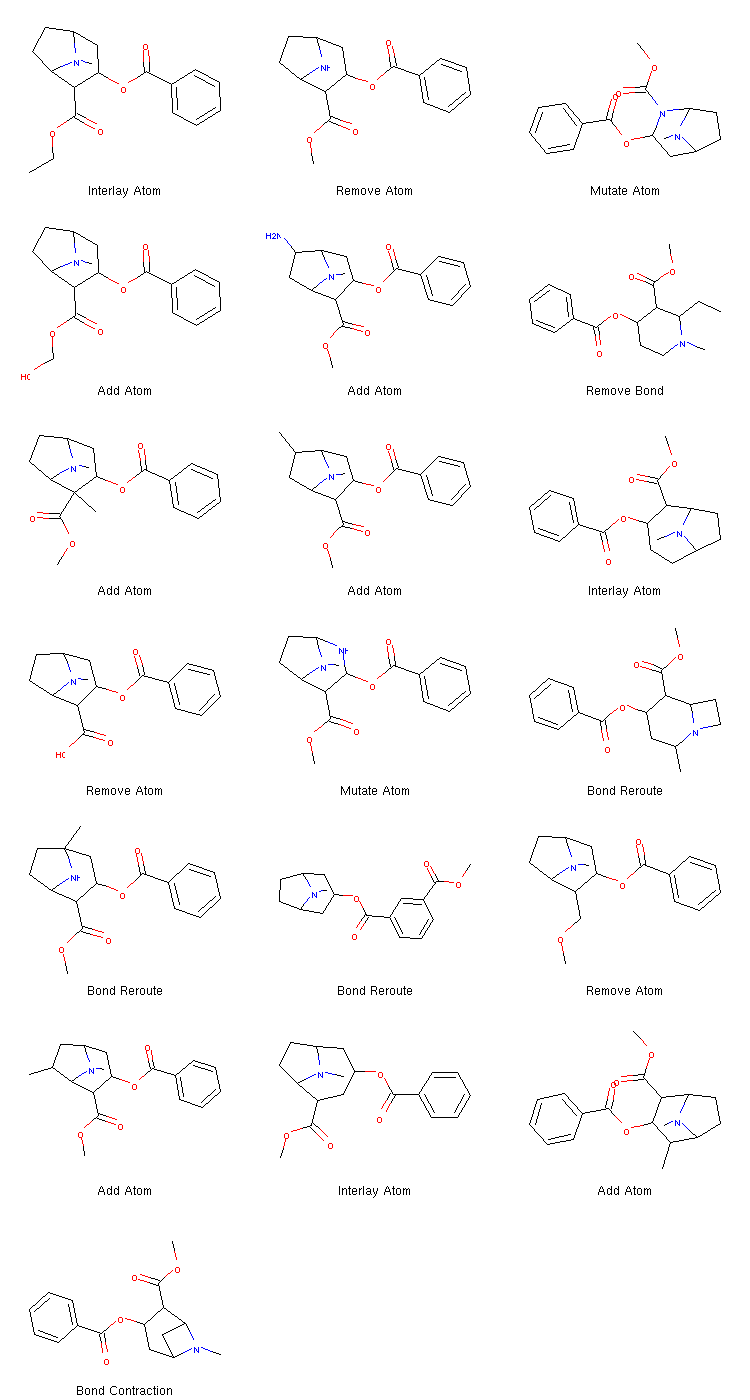

In [11]:
import molpher
from molpher.core.operations import *
from molpher.core import MolpherMol, ExplorationTree as ETree

class MyFilterMorphs(TreeOperation):
    """
    A custom tree operation that accepts
    only the first three morphs after 
    the list of candidates is sorted.
    """

    def __call__(self):
        """
        This method is called automatically by the tree.
        The tree this operation is being run on is accessible
        from the 'tree' member of the class.
        """

        self.tree.candidates_mask = [
            True if idx < 20 and self.tree.candidates[idx].sascore < 6 
            else False 
            for idx, x in enumerate(self.tree.candidates_mask)
        ]

cocaine = MolpherMol('CN1[CH]2CC[CH]1[CH](C(OC)=O)[CH](OC(C3=CC=CC=C3)=O)C2')
procaine = MolpherMol('O=C(OCCN(CC)CC)c1ccc(N)cc1')
tree = ETree.create(source=cocaine, target=procaine) # create the tree

# list of tree operations, defines one iteration
iteration = [
    GenerateMorphsOper()
    , SortMorphsOper()
    , MyFilterMorphs() # our custom filtering procedure
    , ExtendTreeOper()
    , PruneTreeOper()
]

# apply the operations in the list one by one
for oper in iteration:
    tree.runOperation(oper)

# observe the results
print(tree.generation_count)
print(len(tree.leaves))
show_mol_grid(tree.leaves)